In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import numpy as np
from sklearn.metrics import classification_report

In [9]:
# Class labels
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

# Load CIFAR-10 dataset
(x_data, y_data), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values
x_data = x_data.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_data_flat = y_data.flatten()

# split into 43,000 training and 7,000 val
x_train, x_val, y_train, y_val = train_test_split(
    x_data, y_data, test_size=10000, random_state=42, stratify=y_data_flat
)

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_val_cat = to_categorical(y_val, 10)

# Print dataset sizes
print(f"Training set size: {x_train.shape[0]}")
print(f"Validation set size: {x_val.shape[0]}")
print(f"Test set size: {x_test.shape[0]}")

print("Train class distribution:", np.bincount(y_train.flatten()))
print("Val class distribution:  ", np.bincount(y_val.flatten()))

Training set size: 40000
Validation set size: 10000
Test set size: 10000
Train class distribution: [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000]
Val class distribution:   [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD

def MiniVGGNet(width, height, depth, classes):
    inputShape = (height, width, depth)
    chanDim = -1

    if K.image_data_format() == "channels_first":
        inputShape = (depth, height, width)
        chanDim = 1

    model = Sequential()

    # first block
    model.add(Conv2D(32, (3, 3), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(32, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.25))

    # second block
    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.25))

    # classification
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    # output
    model.add(Dense(classes))
    model.add(Activation("softmax"))

    return model

# Create and compile the model
model = MiniVGGNet(32, 32, 3, 10)
model.compile(optimizer=SGD(learning_rate=0.01), loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_6 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                      

In [11]:
# Train the model
history = model.fit(x_train, y_train_cat,
                    validation_data=(x_val, y_val_cat),
                    epochs=15,
                    batch_size=32)

Epoch 1/15
1250/1250 [==============================] - 10s 8ms/step - loss: 1.6597 - accuracy: 0.4364 - val_loss: 1.2510 - val_accuracy: 0.5566
Epoch 2/15
1250/1250 [==============================] - 9s 7ms/step - loss: 1.1941 - accuracy: 0.5742 - val_loss: 1.0790 - val_accuracy: 0.6206
Epoch 3/15
1250/1250 [==============================] - 9s 7ms/step - loss: 1.0251 - accuracy: 0.6400 - val_loss: 1.0480 - val_accuracy: 0.6357
Epoch 4/15
1250/1250 [==============================] - 8s 7ms/step - loss: 0.9223 - accuracy: 0.6772 - val_loss: 0.9527 - val_accuracy: 0.6699
Epoch 5/15
1250/1250 [==============================] - 9s 8ms/step - loss: 0.8523 - accuracy: 0.6992 - val_loss: 0.7815 - val_accuracy: 0.7212
Epoch 6/15
1250/1250 [==============================] - 10s 8ms/step - loss: 0.8023 - accuracy: 0.7177 - val_loss: 0.7567 - val_accuracy: 0.7343
Epoch 7/15
1250/1250 [==============================] - 9s 7ms/step - loss: 0.7475 - accuracy: 0.7363 - val_loss: 0.7366 - val_accurac

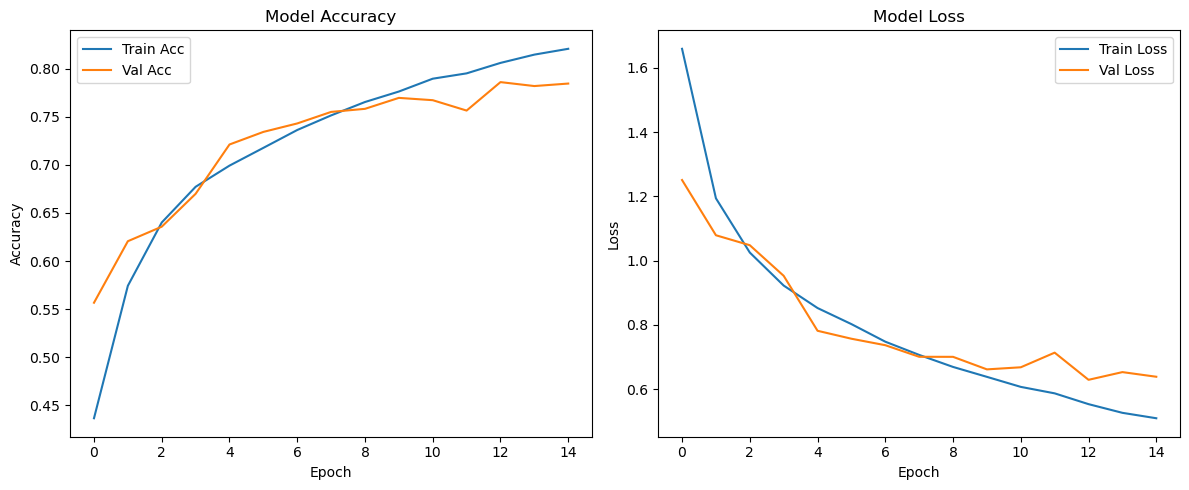

In [12]:
# Plot training accuracy and loss history
plt.figure(figsize=(12, 5))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
y_test_cat = to_categorical(y_test, 10)
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat)
print(f"\nTest set accuracy: {test_accuracy * 100:.2f}%")

# predict and calculate per-class accuracy
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = y_test.flatten()

# print classification report
print("\nClassification Report:")
print(classification_report(y_true_labels, y_pred_labels, target_names=class_names))

313/313 [==============================] - 1s 4ms/step - loss: 0.6511 - accuracy: 0.7816

Test set accuracy: 78.16%
313/313 [==============================] - 1s 2ms/step

Classification Report:
              precision    recall  f1-score   support

    airplane       0.85      0.77      0.80      1000
  automobile       0.94      0.83      0.88      1000
        bird       0.75      0.62      0.68      1000
         cat       0.63      0.64      0.63      1000
        deer       0.66      0.83      0.74      1000
         dog       0.74      0.65      0.69      1000
        frog       0.74      0.91      0.81      1000
       horse       0.88      0.80      0.84      1000
        ship       0.83      0.91      0.87      1000
       truck       0.86      0.86      0.86      1000

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.78     10000
weighted avg       0.79      0.78      0.78     10000

